In [8]:
import numpy as np
import matplotlib.pyplot as plt
f = open('proposal_layer_time_distribution.txt', 'r')
lines = f.readlines()

In [9]:
height = 100
width = len([x for x in lines[0].split()])
data = np.empty((height,width))
avg_data = np.zeros((16,width))
for i in range(0,16):
    offset = i*100
    for j in range(height):
        data[j] = [float(x) for x in lines[offset+1+j].split()]
    
    #print(data)
    for j in range(1,height):
        #print(data[j][1:])
        avg_data[i] = avg_data[i] + data[j]
    avg_data[i] = avg_data[i]/(height-1)
    #print(avg_data[i])
print(avg_data)

[[0.07078379 0.00200285 0.01804975 0.00231433 0.00021328 0.00442165
  0.03632101 0.00609192]
 [0.0684664  0.00207036 0.01791137 0.00232982 0.00020549 0.00431854
  0.03322397 0.00716978]
 [0.06763608 0.00195342 0.01757885 0.00229907 0.00019953 0.00414367
  0.03352857 0.00655587]
 [0.06824074 0.00200445 0.01767679 0.00232696 0.00021398 0.00429281
  0.03423977 0.0061477 ]
 [0.07066841 0.00196605 0.01795276 0.00234575 0.00021094 0.00431908
  0.03641433 0.00611336]
 [0.0698434  0.0020208  0.01818876 0.00233394 0.00021946 0.00453223
  0.03475721 0.00646205]
 [0.0629143  0.00193155 0.01740136 0.00227792 0.00019383 0.00416165
  0.02936066 0.00625376]
 [0.07133068 0.00193796 0.01776845 0.00233351 0.00020537 0.00425261
  0.03731497 0.00620562]
 [0.06444906 0.00198582 0.01795479 0.00235247 0.00020675 0.00426406
  0.03003259 0.00633511]
 [0.06735977 0.00200438 0.01791314 0.00229721 0.00021318 0.00438869
  0.03224151 0.0069704 ]
 [0.07019177 0.00199651 0.01817753 0.0023516  0.00021079 0.00443852
  

['reshape', 'transform_anchor', 'sort', 'generate_output', 'before_nms', 'nms', 'after_nms']


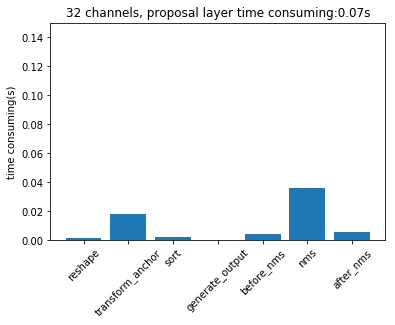

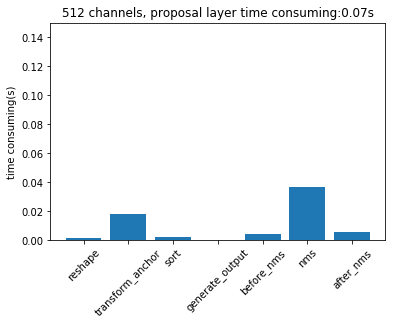

In [10]:
names = [x for x in lines[0].split()]
names = names[1:]
print(names)
for i in [0,15]: 
    x = range(width-1)
    plt.bar(x,avg_data[i][1:])
    plt.ylim(0,0.150)
    plt.xticks(x,names,rotation = 45)
    plt.ylabel('time consuming(s)')
    plt.title(str((i+1)*32)+' channels, proposal layer time consuming:'+'%.2f' %avg_data[i][0]+'s')
    plt.savefig('proposal_layer_time_distribution_'+str((i+1)*32)+'channels.png',bbox_inches='tight')
    plt.show()

[0.07078379 0.0684664  0.06763608 0.06824074 0.07066841 0.0698434
 0.0629143  0.07133068 0.06444906 0.06735977 0.07019177 0.06981814
 0.06907751 0.0642824  0.06949215 0.07086087]


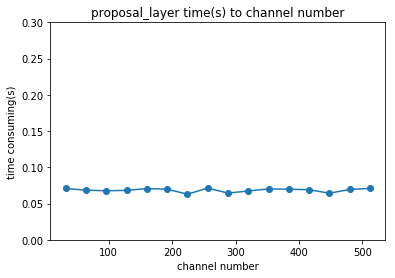

In [11]:
#names = [x for x in lines[0].split()]
x = range(32,512+32,32)
print(avg_data[:,0])
plt.plot(x,avg_data[:,0],marker = 'o')
plt.ylim(0,0.3)
#plt.xticks(x,names,rotation = 45)
plt.ylabel('time consuming(s)')
plt.xlabel('channel number')
plt.title('proposal_layer time(s) to channel number')
plt.savefig('proposal_layer_time_to_channel_number.png',bbox_inches='tight')
plt.show()